<a href="https://colab.research.google.com/github/saghar-trade/Time-series/blob/main/SMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error,\
mean_squared_error, mean_absolute_error,r2_score


In [4]:
from google.colab import drive
drive.mount('/content/drive')
close = pd.read_csv('/content/drive/MyDrive/sp500_close.csv' , index_col=0 , parse_dates=True)
close.tail()

Mounted at /content/drive


,AAL,AAPL,AAP,ABBV,ABC,ABT,ACN,ADBE,ADI,ADM,...,XLNX,XL,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
2018-02-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-05,49.76,156.49,109.86,109.51,91.90,58.73,151.83,190.27,85.40,40.60,...,66.97,37.68,79.72,58.54,31.38,72.66,79.80,123.18,51.65,73.83
2018-02-06,51.18,163.03,112.20,111.20,91.54,58.86,154.69,194.47,88.54,42.00,...,68.99,37.34,78.35,58.46,30.85,71.33,80.58,122.30,52.52,73.27
2018-02-07,51.40,159.54,109.93,113.62,94.22,58.67,155.15,192.34,85.35,42.19,...,66.97,42.00,76.94,58.30,31.18,71.79,80.13,120.78,54.02,73.86


In [5]:
goog=close[['GOOG']].copy().dropna()
goog.head()

,GOOG
2014-03-27,558.46
2014-03-28,559.99
2014-03-31,556.97
2014-04-01,567.16
2014-04-02,567.00


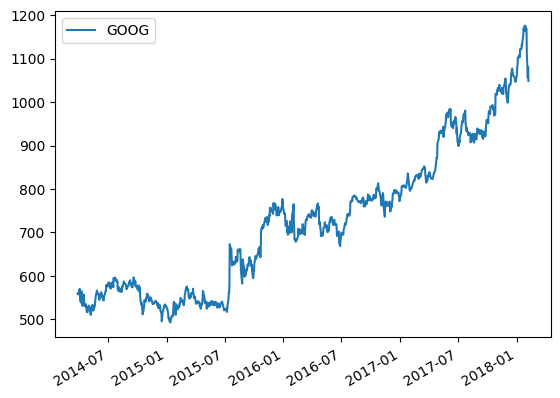

In [6]:
goog.plot();

<Axes: >

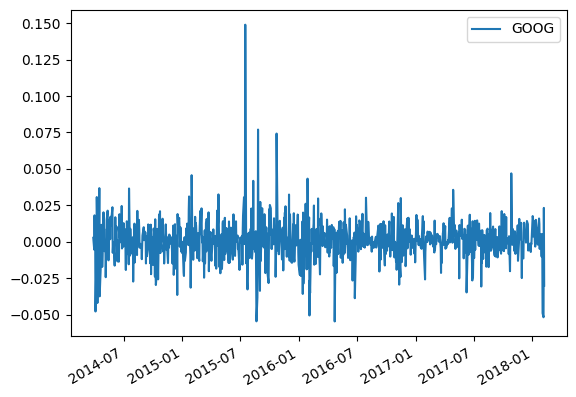

In [7]:
#daily log percentage rate
goog_ret=np.log(goog.pct_change(1)+1)
goog_ret.plot()

In [8]:
goog['SMA-10']=goog['GOOG'].rolling(10).mean()
goog.head(20)

,GOOG,SMA-10
2014-03-27,558.46,NaN
2014-03-28,559.99,NaN
2014-03-31,556.97,NaN
2014-04-01,567.16,NaN
2014-04-02,567.00,NaN
2014-04-03,569.74,NaN
2014-04-04,543.14,NaN
2014-04-07,538.15,NaN
2014-04-08,554.90,NaN
2014-04-09,564.14,557.965


In [9]:
type(goog['GOOG'].rolling(10))

pandas.core.window.rolling.Rolling

<Axes: >

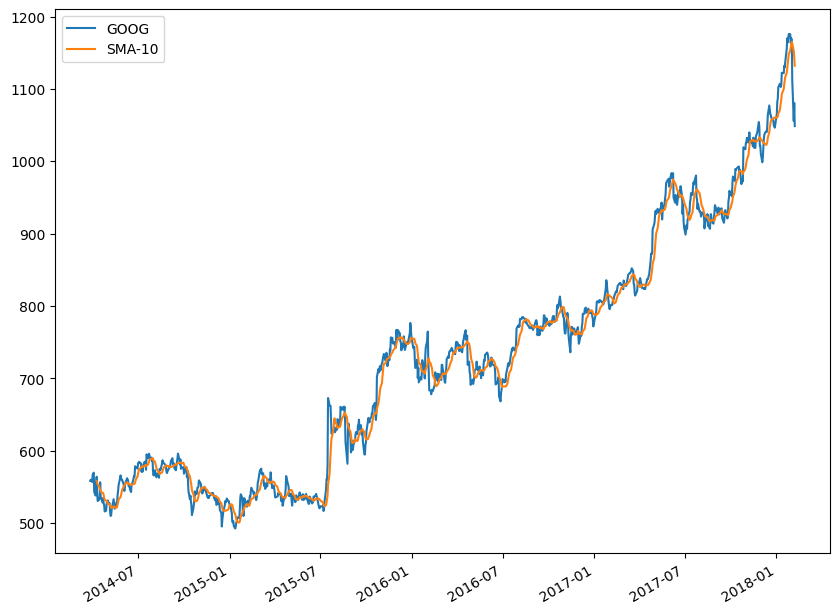

In [10]:
goog.plot(figsize=(10,8))

In [11]:
goog['SMA-50']=goog['GOOG'].rolling(50).mean()
goog.tail(20)

,GOOG,SMA-10,SMA-50
2018-01-10,1102.61,1079.583,1043.9816
2018-01-11,1105.52,1085.198,1045.7498
2018-01-12,1122.26,1092.610,1047.8622
2018-01-16,1121.76,1100.146,1049.7874
2018-01-17,1131.98,1106.844,1051.9154
2018-01-18,1129.79,1111.575,1053.8616
2018-01-19,1137.51,1116.686,1056.0938
2018-01-22,1155.81,1122.044,1058.5434
2018-01-23,1169.97,1128.347,1061.1458
2018-01-24,1164.24,1134.145,1063.8054


<Axes: >

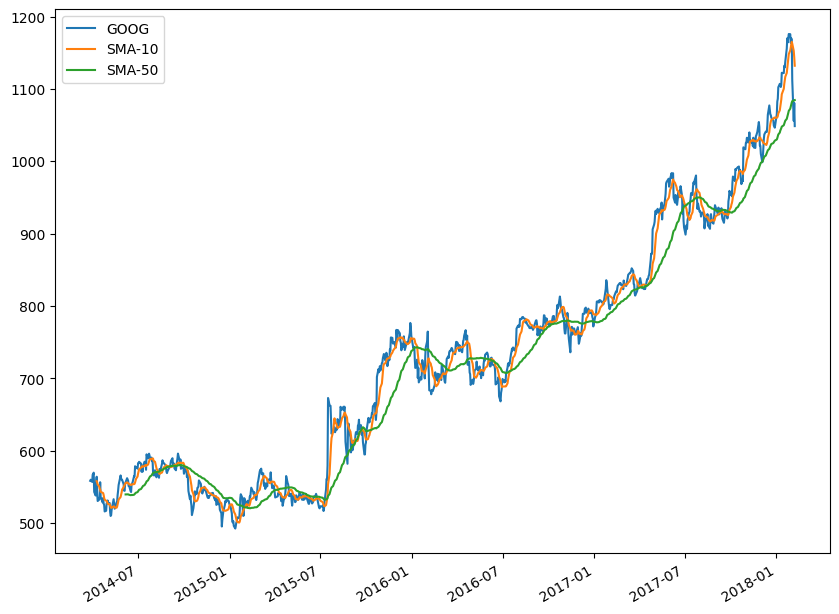

In [12]:
goog.plot(figsize=(10,8))


In [14]:
goog_aapl=close[['GOOG','AAPL']].copy().dropna()

In [26]:
cov=goog_aapl.rolling(50).cov()
cov


GOOG       AAPL
2014-03-27 GOOG          NaN        NaN
           AAPL          NaN        NaN
2014-03-28 GOOG          NaN        NaN
           AAPL          NaN        NaN
2014-03-31 GOOG          NaN        NaN
...                      ...        ...
2018-02-05 AAPL    34.825709  17.568865
2018-02-06 GOOG  2691.756465  38.174468
           AAPL    38.174468  19.121371
2018-02-07 GOOG  2678.778214  49.980378
           AAPL    49.980378  22.052882

[1950 rows x 2 columns]

In [24]:
cov.loc['2018-02-07'].to_numpy()

array([[2678.77821424,   49.98037849],
       [  49.98037849,   22.05288249]])

In [25]:
goog_aapl_ret=np.log(1+goog_aapl.pct_change(1))

<Axes: >

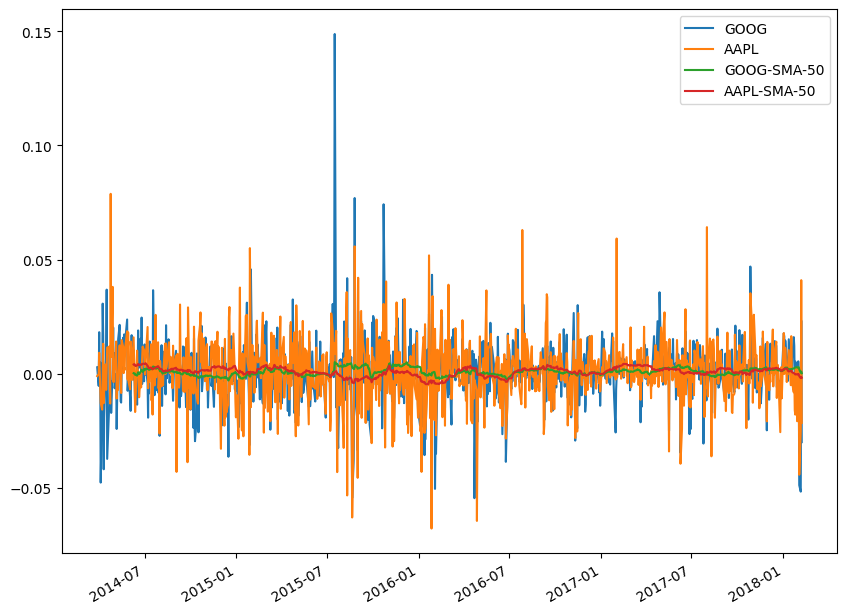

In [29]:
goog_aapl_ret['GOOG-SMA-50']=goog_aapl_ret['GOOG'].rolling(50).mean()
goog_aapl_ret['AAPL-SMA-50']=goog_aapl_ret['AAPL'].rolling(50).mean()
goog_aapl_ret.plot(figsize=(10,8))


In [32]:
cov=goog_aapl_ret[['GOOG-SMA-50','AAPL-SMA-50']].rolling(50).cov()
cov.tail()

GOOG-SMA-50   AAPL-SMA-50
2018-02-05 AAPL-SMA-50 -7.715772e-08  1.188405e-06
2018-02-06 GOOG-SMA-50  2.852362e-07 -1.882949e-08
           AAPL-SMA-50 -1.882949e-08  1.329746e-06
2018-02-07 GOOG-SMA-50  3.430702e-07  8.238184e-08
           AAPL-SMA-50  8.238184e-08  1.506869e-06

In [33]:
corr=goog_aapl_ret[['GOOG-SMA-50','AAPL-SMA-50']].rolling(50).corr()
corr.tail(16)

GOOG-SMA-50  AAPL-SMA-50
2018-01-29 GOOG-SMA-50     1.000000    -0.353417
           AAPL-SMA-50    -0.353417     1.000000
2018-01-30 GOOG-SMA-50     1.000000    -0.397767
           AAPL-SMA-50    -0.397767     1.000000
2018-01-31 GOOG-SMA-50     1.000000    -0.426551
           AAPL-SMA-50    -0.426551     1.000000
2018-02-01 GOOG-SMA-50     1.000000    -0.462629
           AAPL-SMA-50    -0.462629     1.000000
2018-02-02 GOOG-SMA-50     1.000000    -0.406629
           AAPL-SMA-50    -0.406629     1.000000
2018-02-05 GOOG-SMA-50     1.000000    -0.138433
           AAPL-SMA-50    -0.138433     1.000000
2018-02-06 GOOG-SMA-50     1.000000    -0.030574
           AAPL-SMA-50    -0.030574     1.000000
2018-02-07 GOOG-SMA-50     1.000000     0.114578
           AAPL-SMA-50     0.114578     1.000000